## Predict Project : Climate Change Classification
## Team_GM6
- Ditheto Mathekga (Team leader )  
-  Njabulo Preysgod Nsibande 
- Sinhle Nkambule  
- Nthapeleng Linah Raphela
- Donovan Makate  
- Bunga Never Valoyi  

© Explore Data Science Academy

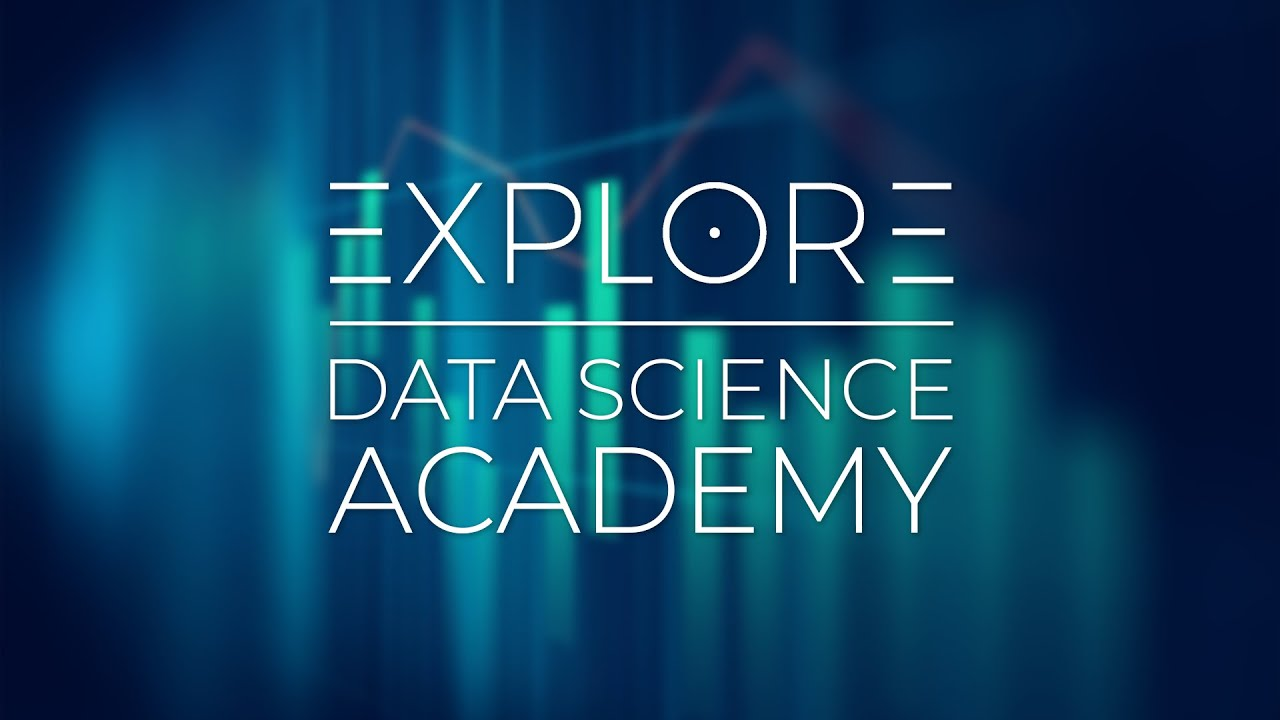

### Honour Code

We TEAM_GM6, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

## 1. Predict Overview: Climate Change Classification

### 1.1. Problem Statement

Many companies are built around reducing their environmental impact or carbon footprint. They offer environmentally friendly and sustainable products and services with respect to their values and ideals.


### 1.2. Aims and Objectives

The goal of this project is to develop a machine learning model that can rank whether or not someone believes in climate change based on new Twitter data. By providing an accurate and robust solution to this task, we are basically helping companies gain access to a large pool of customer views across many demographic and geographic groups, enabling them to gain new insights and better inform future marketing initiatives.

## Table of Contents

<a href=#one>2. Importing Packages</a>

<a href=#two>3. Importing The Data</a>

<a href=#three>4. Exploratory Data Analysis (EDA)</a>

<a href=#four>5. Data Engineering</a>

<a href=#five>6. Modeling</a>

<a href=#six>7. Model Performance</a>

<a href=#seven>8. Model Explanations</a>

<a href=#seven>9. Generating Submission File</a>

<a href=#seven>10. References</a>

## 2. Importing Packages

In [1]:
# Import library to save model
import pickle

# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Import library for train test split
from sklearn.model_selection import train_test_split

# Import Machine Learning algorithms
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Import libraries for Natural Languge Processing
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


<a id="two"></a>
## 3. Importing The Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we will import the data from the `train` file into a DataFrame. |

---

The preparation dataset is stored in a variable named train, while the test dataset is stored in the test variable.
The following and quite possibly the main cycle is to play out an EDA, which is Exploratory Data Analysis, which includes examining the preparation dataset in other to determine significant bits of knowledge about the information.

In [2]:
# Importing the train & test data sets
train = pd.read_csv('train.csv')
test = pd.read_csv('test_with_no_labels.csv')

In [3]:
# View the first 5 rows of the train data
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [4]:
# View the first 5 rows of the test data
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


<a id="three"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we will perform an in-depth analysis of all the variables in the DataFrame. |

### Data Description
- -1 Anthropogenic : The tweet does not believe in man-made climate change.
- 0 Neutral : The tweet neither supports nor denied the belief of man-made climate change.
- 1 Prominent : The tweet supports the belief of man-made climate change.
- 2 News : The tweet links to actual news/fact about climate change.

In [5]:
# Checking the data structure and size
train.shape

(15819, 3)

The train dataset is made up 15819 rows and 3 columns.

In [6]:
# Checking Summary Statistics
train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


In [7]:
## getting feature name and their types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The information above indicates that both sentiment and tweet id are Integer datatype .
Object type is thedetected on the message column. 
There are 15819 values in each column, indicating that no value is missing.

In [8]:
# see statistics for categorical features
print("See distribution of messages per sentiment : ")
count = train.groupby("sentiment").count()["message"].reset_index().sort_values(by = "message", ascending = False)
count.style.background_gradient(cmap = "Purples")

See distribution of messages per sentiment : 


,sentiment,message
2,1,8530
3,2,3640
1,0,2353
0,-1,1296


C:\Users\Sinhle Nkambule\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


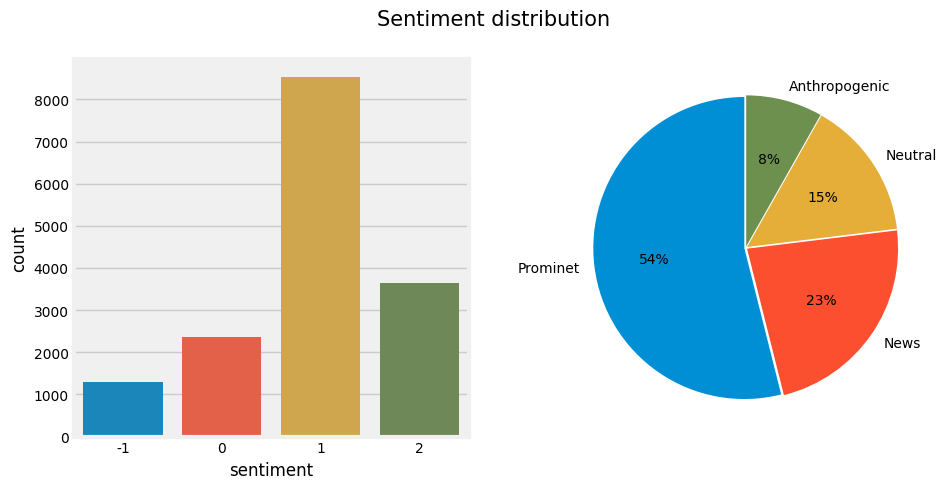

In [9]:
# Display distribution of the sentiment graphically
fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(10, 5), 
                         dpi=100)

sns.countplot(train['sentiment'], ax=axes[0])

code_labels=['Prominet', 'News', 'Neutral', 'Anthropogenic']
axes[1].pie(train['sentiment'].value_counts(),
            labels= code_labels,
            autopct='%1.0f%%',
            startangle=90,
            explode = (0.01, 0.01, 0.01, 0.01))

fig.suptitle('Sentiment distribution', fontsize=15)
plt.show()

##### Quick overview of the data above:
* There is a strong imbalance amongst the sentiments of the tweets.
* Based on the information/sentiments displayed by our histogram, we can see that the vast majority lies within the "1"-sentiment (the tweet that supports the belief of man-made climate change).
* "1"-sentiment (Prominent) dominates the chart with 54% contribution, while "-1"-sentiment (Anthropogenic) only contrinutes with 8%.
* Through the precentages displayed in the pie-chart, we can observe that the majority believes in man-made climate change 

In [10]:
# See statistics for non- numerical features
train.groupby('sentiment').describe(include=['object'])

message                                                            \
            count unique                                                top   
sentiment                                                                     
-1           1296   1222  RT @realDonaldTrump: The concept of global war...   
 0           2353   2245  RT @ULTRAVlOLENCE: Interviewer: 'What do you t...   
 1           8530   7224  RT @StephenSchlegel: she's thinking about how ...   
 2           3640   3542  RT @business: China tells Trump climate change...   

                
          freq  
sentiment       
-1          22  
 0          20  
 1         307  
 2          12

##### Quick observations:
The table above represents the number of tweets and the unique messages for each sentiment and how often that messages appears.
There are a total of 14229 unique tweets. 
The most common tweet for "1"-sentiment class is "RT @StephenSchlegel: she's thinking about how..." with occurrance of 307 times.

##### Corpus of each class sentiment :
We'll now construct a corpus for each sentiment type. Using the corpus, we build a sentiment classifier, that is able to determine positive, negative and neutral sentiments for a document.

In [11]:
# Create a Corpus for every class sentiment 
Neutral_tweets = ' '.join([text for text in train['message']
                        [train['sentiment'] == 0]])
Natural_tweets = ' '.join([text for text in train['message']
                       [train['sentiment'] == -1]])
Anthropogenic_tweets = ' '.join([text for text in train['message']
                           [train['sentiment'] == 1]])
News_tweets = ' '.join([text for text in train['message']
                        [train['sentiment'] == 2]])

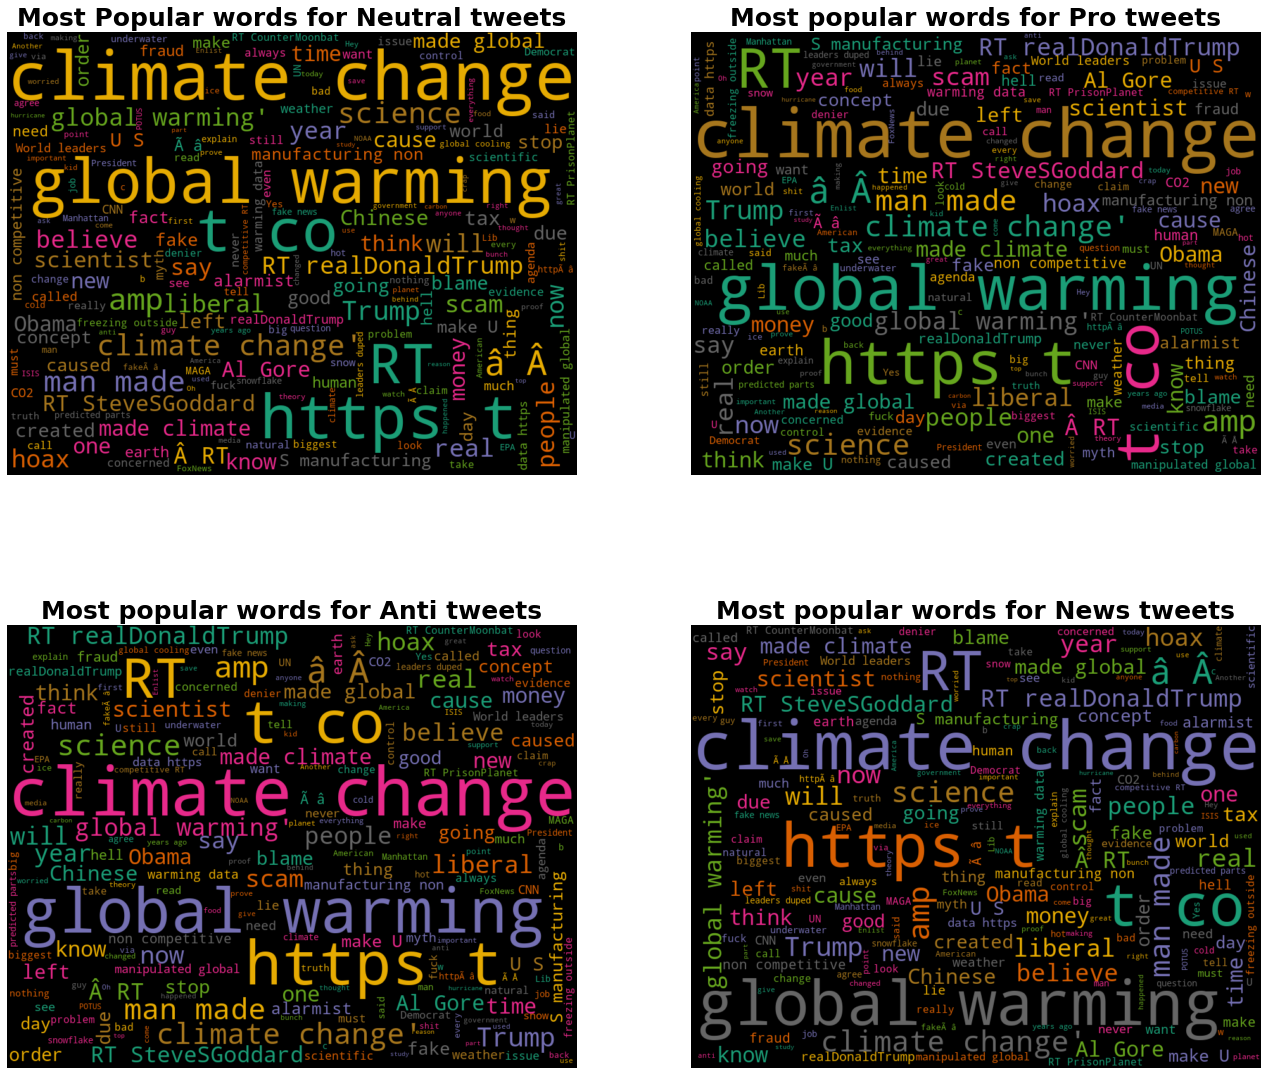

In [15]:
# Visualising each sentiment class according to the count of words
title = ['Most Popular words for Neutral tweets',
              'Most popular words for Pro tweets',
              'Most popular words for Anti tweets',
              'Most popular words for News tweets']
list_tweets = [Neutral_tweets, Natural_tweets,
              Anthropogenic_tweets, News_tweets]

# Create word clouds of the most common words in each sentiment class
word_cloud = WordCloud(width=900, height=700, 
               background_color='black', colormap='Dark2',
               max_font_size=200, random_state=42)

plt.rcParams['figure.figsize'] = [20, 20]

# Create subplots 
for i in range(0, len(list_tweets)):
    word_cloud.generate(list_tweets[1])
    
    plt.subplot(2, 2, i + 1)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title[i], fontsize = 25, fontweight='bold')
    
plt.show()

##### Quick observations:
You can see the top five of the most popular words in all of the four sentiment classes but Climate change and Global Warming will be more useful in our classification.

<a id="four"></a>
## 5. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section, we will do : data cleaning . |

---

<a id="five"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we will create one or more classifying models that are able to accurately classify  whether or not a person believes in climate change, based on their novel tweet data.. |

---

<a id="six"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section, we will compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

<a id="seven"></a>
## 8. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, we will discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

<a id="seven"></a>
## 9. Generating Submission File
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Submision File ⚡ |
| :--------------------------- |
| In this section, we will generate the csv file that we will use for kaggle submission. |

---

<a id="seven"></a>
## 10. References
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: References ⚡ |
| :--------------------------- |
| In this section, we will list all the resources we used to carry out this project. |

---